In [2]:
import pandas as pd
import os

In [3]:
dataset_location = "gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/"
trainset = os.path.join(dataset_location, "train.csv") 
testset = os.path.join(dataset_location, "test.csv") 

In [8]:
user_features = [
    "Gender",
    "Age",
    "Occupation",
    "City_Category",
    "Stay_In_Current_City_Years",
    "Marital_Status"
    ]

In [ ]:
df=pd.read_csv(testset)

In [ ]:
distinct_prods_by_features=df.groupby(user_features)["Product_ID"].nunique()

<AxesSubplot:ylabel='Frequency'>

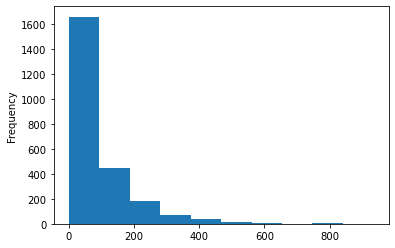

In [13]:
distinct_prods_by_features.plot.hist()

In [28]:
integral=distinct_prods_by_features.apply(lambda x: distinct_prods_by_features.sort_values()[distinct_prods_by_features <= x].sum())

In [ ]:
df_integral=pd.DataFrame({
    "integral": integral.sort_values().unique(),
    "min_k": distinct_prods_by_features.sort_values().unique()
})
df_integral["fraction_discarded"]=df_integral["integral"]/df_integral["integral"].max()

# Fraction of records discarded from test set WRT min K

<AxesSubplot:xlabel='min_k'>

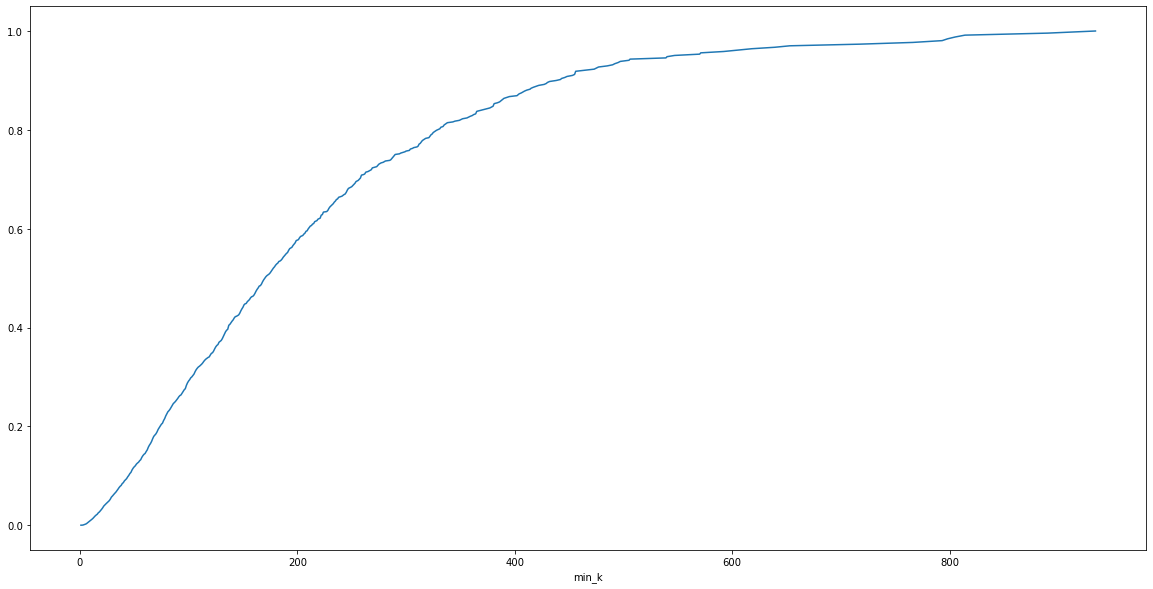

In [35]:
df_integral.set_index("min_k")["fraction_discarded"].plot(figsize=(20,10))

<AxesSubplot:xlabel='min_k'>

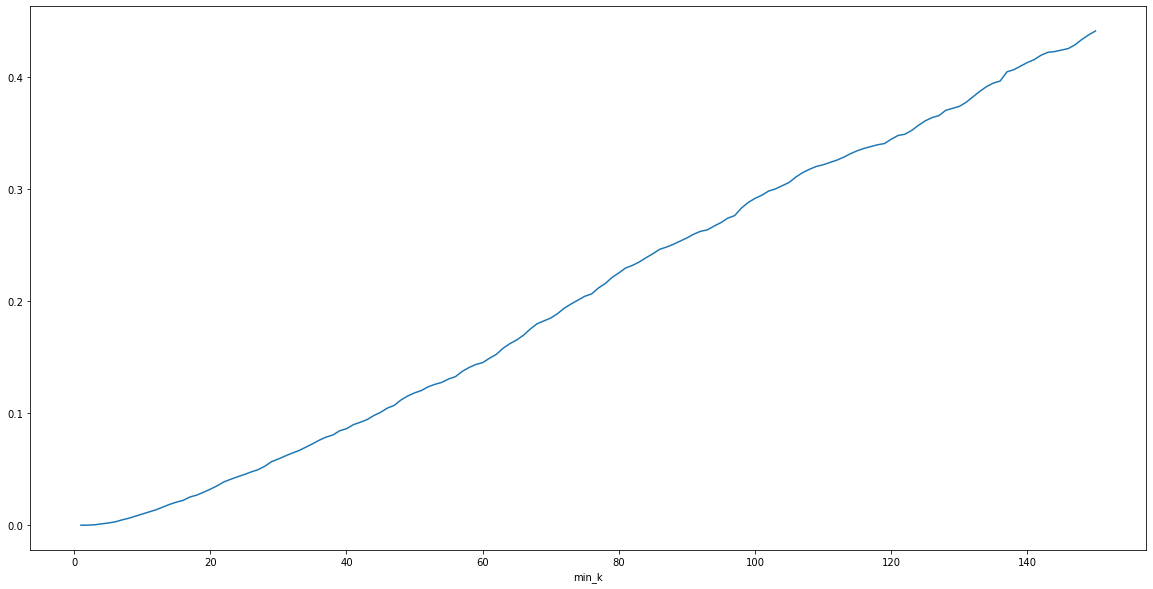

In [38]:
# zoom on min_k in [0,150]
df_integral[df_integral["min_k"]<=150].set_index("min_k")["fraction_discarded"].plot(figsize=(20,10))

In [39]:
df_integral[df_integral["min_k"]==10]

,integral,min_k,fraction_discarded
9,2168,10,0.009957


In [41]:
df_integral[df_integral["min_k"]==50]

,integral,min_k,fraction_discarded
49,25713,50,0.118088


In [40]:
df_integral[df_integral["min_k"]==100]

,integral,min_k,fraction_discarded
99,63513,100,0.291685


## conclusions
Setting Kmin to 10 excludes only 1% of the test set, which is acceptable  
Setting Kmin to 100 excludes 30% of the test set. This whould increase metrics robustness (100 product proposal tested against 100 GT products) at the cost of reduced coverage  
Setting Kmin to 50 is half way through, excluding 12% of the test set

### notes
These are computed considering the highest number of features, so it is a worst case scenario. With less features, less records get excluded for the same Kmin

In [44]:
pd.read_csv(trainset).shape

(550068, 12)